# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Rainfall Weather Forecasting.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.set_index('Date',inplace=True)

# Exploratory Data Analysis

In [4]:
print('The Shape of the dataset is ',df.shape)

The Shape of the dataset is  (8425, 22)


In [5]:
print('Columns of the dataset are ',df.columns)

Columns of the dataset are  Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


In [6]:
print('Number of duplicated rows in the dataset are ',df.duplicated().sum())

Number of duplicated rows in the dataset are  1673


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(6752, 22)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6752 entries, 2008-12-01 to 2017-06-25
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       6752 non-null   object 
 1   MinTemp        6692 non-null   float64
 2   MaxTemp        6705 non-null   float64
 3   Rainfall       6622 non-null   float64
 4   Evaporation    3841 non-null   float64
 5   Sunshine       3526 non-null   float64
 6   WindGustDir    5820 non-null   object 
 7   WindGustSpeed  5820 non-null   float64
 8   WindDir9am     5968 non-null   object 
 9   WindDir3pm     6468 non-null   object 
 10  WindSpeed9am   6699 non-null   float64
 11  WindSpeed3pm   6662 non-null   float64
 12  Humidity9am    6708 non-null   float64
 13  Humidity3pm    6666 non-null   float64
 14  Pressure9am    5454 non-null   float64
 15  Pressure3pm    5451 non-null   float64
 16  Cloud9am       4896 non-null   float64
 17  Cloud3pm       4860 non-null   float64
 18

In [10]:
df.isnull().sum()

Location            0
MinTemp            60
MaxTemp            47
Rainfall          130
Evaporation      2911
Sunshine         3226
WindGustDir       932
WindGustSpeed     932
WindDir9am        784
WindDir3pm        284
WindSpeed9am       53
WindSpeed3pm       90
Humidity9am        44
Humidity3pm        86
Pressure9am      1298
Pressure3pm      1301
Cloud9am         1856
Cloud3pm         1892
Temp9am            41
Temp3pm            82
RainToday         130
RainTomorrow      130
dtype: int64

In [11]:
df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].median())
df['MaxTemp']=df['MaxTemp'].fillna(df['MaxTemp'].median())
df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].median())
df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].median())
df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].median())
df['WindGustDir']=df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].median())
df['WindDir9am']=df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm']=df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['WindSpeed9am']=df['WindSpeed9am'].fillna(df['WindSpeed9am'].median())
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].median())
df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].median())
df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].median())
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].median())
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].median())
df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].median())
df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].median())
df['Temp9am']=df['Temp9am'].fillna(df['Temp9am'].median())
df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].median())
df['RainToday']=df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow']=df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [12]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols=df.select_dtypes(include=['int64','float64']).columns
print('Categorical Columns are ',cat_cols)
print('Numerical Columns are ',num_cols)

Categorical Columns are  Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')
Numerical Columns are  Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')


In [13]:
df.nunique().to_frame('Unique values')

,Unique values
Location,12
MinTemp,285
MaxTemp,331
Rainfall,250
Evaporation,116
Sunshine,140
WindGustDir,16
WindGustSpeed,52
WindDir9am,16
WindDir3pm,16


In [14]:
for col in cat_cols:
    print(col)
    print(df[col].value_counts())
    print('='*50)

Location
PerthAirport    1204
Albury           907
Newcastle        812
Melbourne        811
Williamtown      615
CoffsHarbour     611
Brisbane         579
Penrith          482
Darwin           250
Wollongong       237
Adelaide         205
Uluru             39
Name: Location, dtype: int64
WindGustDir
E      1450
SW      465
N       459
W       434
WSW     420
WNW     398
SSE     390
S       376
SE      370
ENE     357
NE      300
SSW     299
NW      296
NNE     287
ESE     267
NNW     184
Name: WindGustDir, dtype: int64
WindDir9am
N      1393
SW      590
NW      463
SE      439
ENE     397
WSW     394
SSW     368
NE      364
E       338
NNE     337
S       324
WNW     301
SSE     300
W       299
ESE     229
NNW     216
Name: WindDir9am, dtype: int64
WindDir3pm
SE     961
WSW    499
S      493
NE     480
SW     428
SSE    421
NW     400
W      399
E      392
WNW    389
ESE    363
N      354
ENE    348
NNE    305
SSW    277
NNW    243
Name: WindDir3pm, dtype: int64
RainToday
No     5180


In [15]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,6752.000000,6752.000000,6752.000000,6752.000000,6752.000000,6752.000000,6752.000000,6752.000000,6752.000000,6752.000000,6752.000000,6752.000000,6752.000000,6752.000000,6752.000000,6752.000000
mean,13.109953,24.094180,2.727444,4.999570,8.420809,38.704680,12.768217,17.563537,67.509775,50.461197,1017.621253,1015.116084,4.519105,4.511256,17.895675,22.701170
std,5.544775,6.134863,10.497380,3.364223,2.791204,13.403733,9.796086,9.555928,17.195467,18.512111,6.032385,5.972061,2.494121,2.344912,5.726654,5.976638
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.000000,19.600000,0.000000,4.000000,8.800000,30.000000,6.000000,11.000000,56.000000,38.000000,1014.200000,1011.500000,2.000000,3.000000,13.900000,18.400000
50%,13.200000,23.500000,0.000000,4.600000,9.000000,37.000000,11.000000,17.000000,68.000000,50.000000,1017.600000,1015.100000,5.000000,5.000000,18.000000,22.100000
75%,17.400000,28.400000,0.800000,5.000000,9.200000,46.000000,19.000000,24.000000,80.000000,62.000000,1020.900000,1018.400000,7.000000,6.000000,22.200000,26.800000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


* Rainfall, Evaporation, WindGustSpeed has huge difference between 75th percentile and max.
* So the outliers are present.

# Univariate Analysis

<AxesSubplot:xlabel='count', ylabel='Location'>

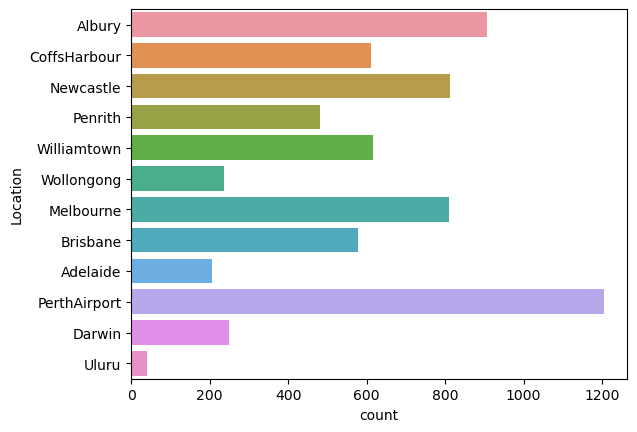

In [16]:
sns.countplot(y=df['Location'])

<AxesSubplot:xlabel='count', ylabel='WindGustDir'>

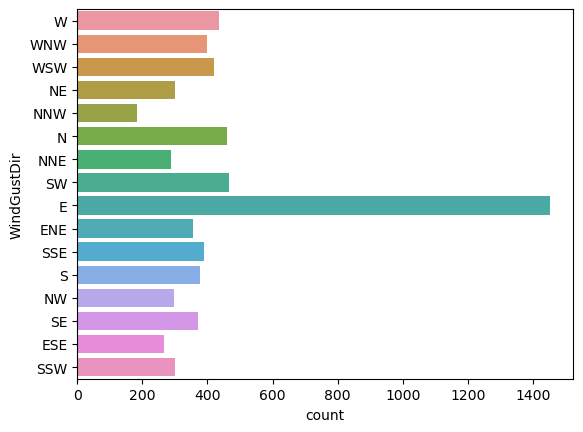

In [17]:
sns.countplot(y=df['WindGustDir'])

<AxesSubplot:xlabel='count', ylabel='WindDir9am'>

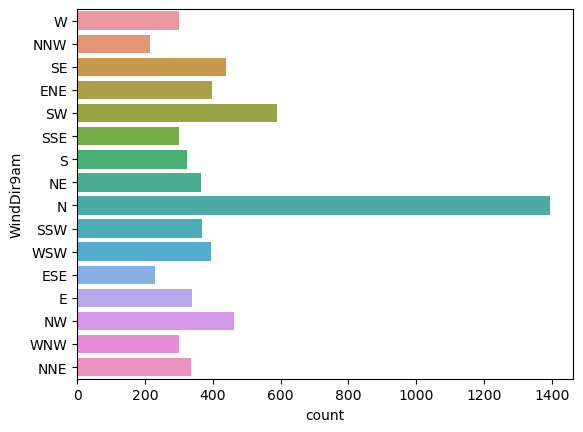

In [18]:
sns.countplot(y=df['WindDir9am'])

<AxesSubplot:xlabel='count', ylabel='WindDir3pm'>

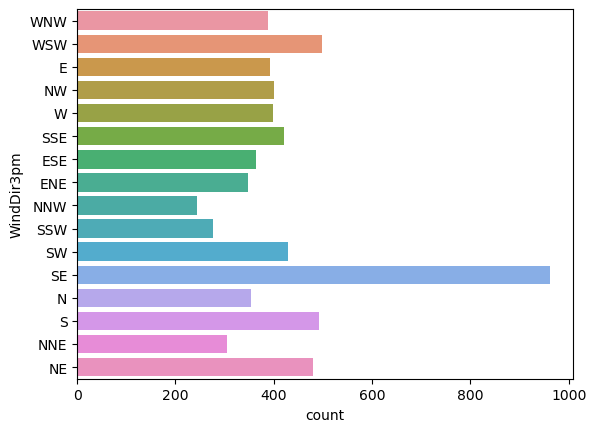

In [19]:
sns.countplot(y=df['WindDir3pm'])

<AxesSubplot:xlabel='RainToday', ylabel='count'>

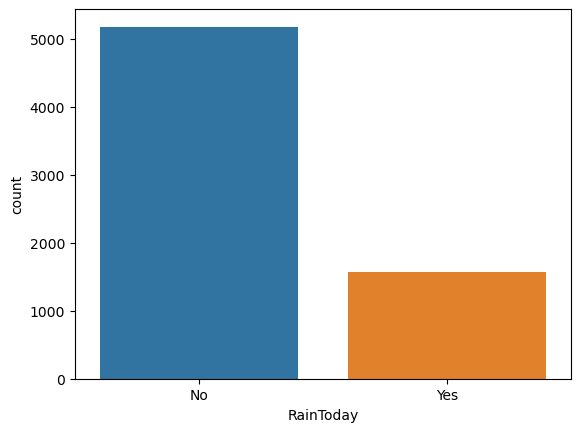

In [20]:
sns.countplot(df['RainToday'])

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

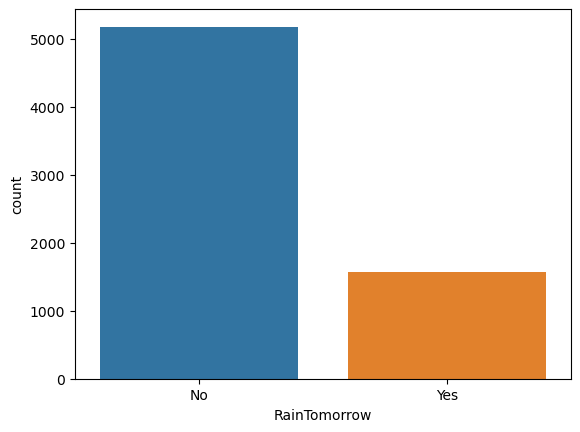

In [21]:
sns.countplot(df['RainTomorrow'])

# Bivariate Analysis

<AxesSubplot:xlabel='MinTemp', ylabel='MaxTemp'>

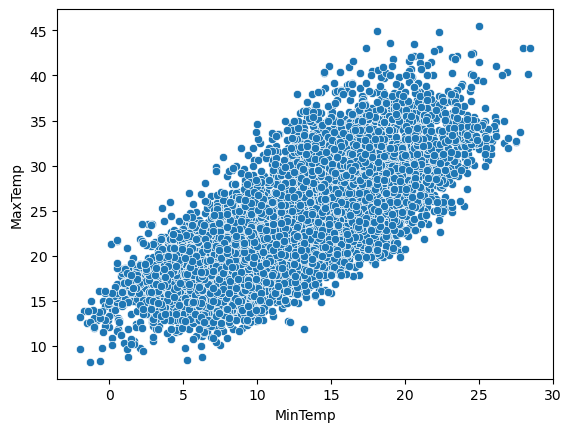

In [22]:
sns.scatterplot(x='MinTemp',y='MaxTemp',data=df)

<AxesSubplot:xlabel='Rainfall', ylabel='Evaporation'>

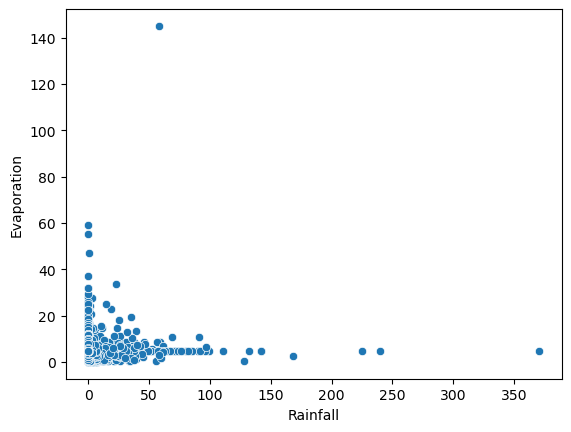

In [23]:
sns.scatterplot(x='Rainfall',y='Evaporation',data=df)

<AxesSubplot:xlabel='Humidity9am', ylabel='Humidity3pm'>

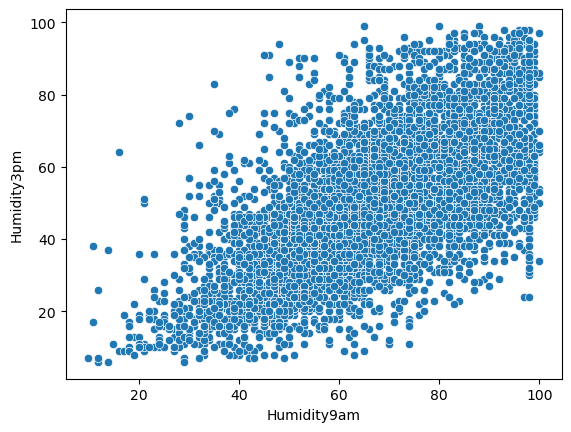

In [24]:
sns.scatterplot(x='Humidity9am',y='Humidity3pm',data=df)

# Encoding Techniques

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le=LabelEncoder()
for col in cat_cols:
    df[col]=le.fit_transform(df[col])
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,1,13.4,22.9,0.6,4.6,9.0,13,44.0,13,14,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
2008-12-02,1,7.4,25.1,0.0,4.6,9.0,14,44.0,6,15,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
2008-12-03,1,12.9,25.7,0.0,4.6,9.0,15,46.0,13,15,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0
2008-12-04,1,9.2,28.0,0.0,4.6,9.0,4,24.0,9,0,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0
2008-12-05,1,17.5,32.3,1.0,4.6,9.0,13,41.0,1,7,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,9,2.8,23.4,0.0,4.6,9.0,0,31.0,9,1,...,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,0,0
2017-06-22,9,3.6,25.3,0.0,4.6,9.0,6,22.0,9,3,...,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,0,0
2017-06-23,9,5.4,26.9,0.0,4.6,9.0,3,37.0,9,14,...,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,0,0


# Detecting Outlers

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

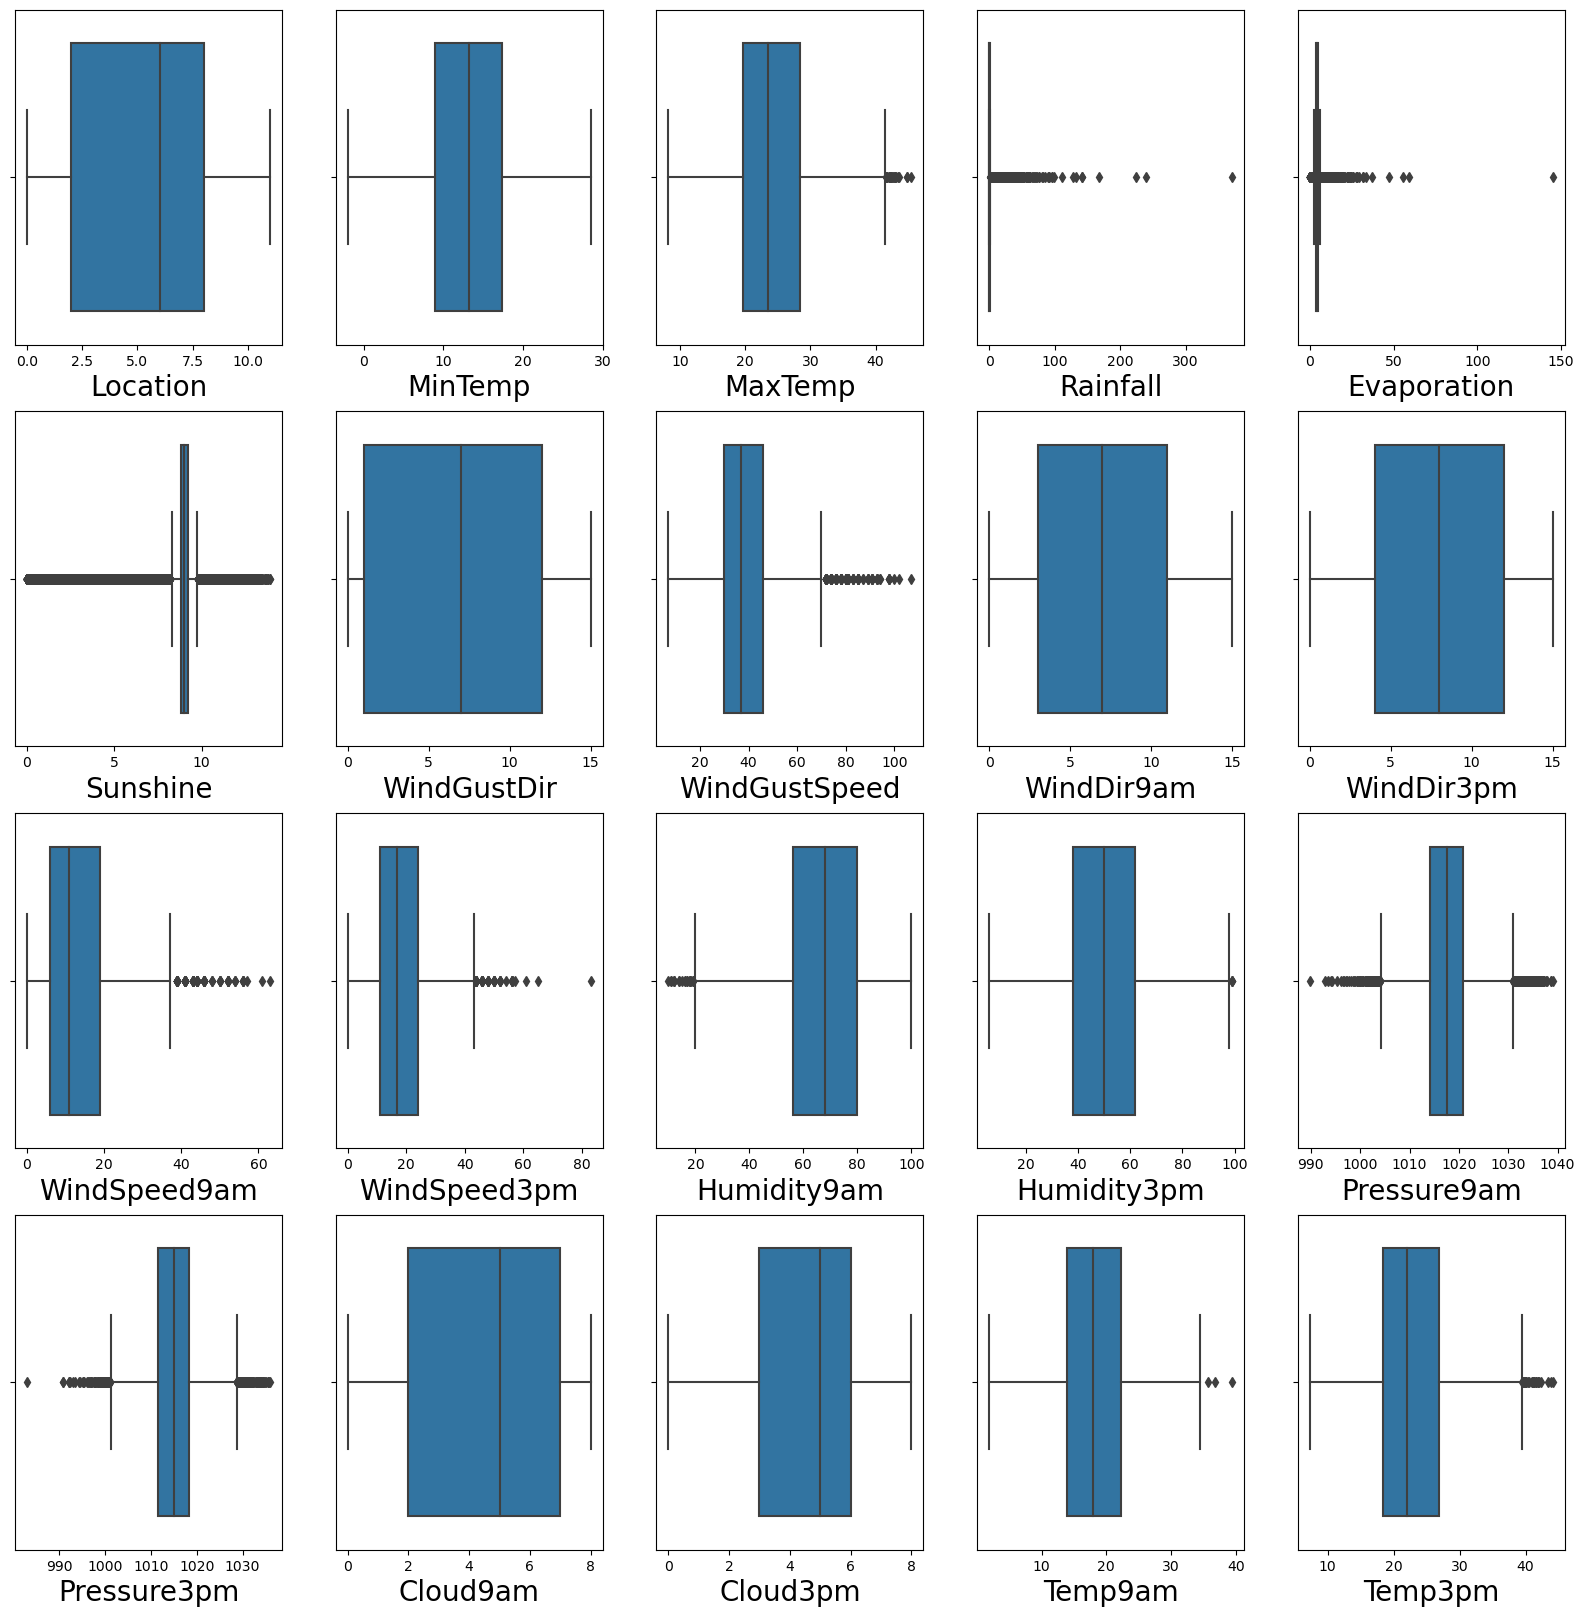

In [27]:
plt.figure(figsize=(20,20))
plot_number=1
for col in df:
    if plot_number <=20:
        ax=plt.subplot(4,5,plot_number)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=20)
    plot_number+=1
    
plt.tight_layout

Outliers present in MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed, WindSpeed9am, WindSpeed3am, Humidity9am, Pressure9am, Pressure3pm, RainToday, RainTomorrow

In [28]:
from scipy.stats import zscore

In [29]:
z=np.abs(zscore(df))
z

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,1.393791,0.052314,0.194669,0.202679,0.118779,0.207521,1.219593,0.395092,1.314129,1.371800,...,0.202989,1.537550,1.644787,1.342364,1.395743,0.208443,0.173880,0.150793,0.550886,0.550886
2008-12-02,1.393791,1.029866,0.163964,0.259841,0.118779,0.207521,1.410759,0.395092,0.223957,1.594533,...,1.367309,1.375482,1.164013,1.225142,0.192826,0.208443,0.121489,0.267533,0.550886,0.550886
2008-12-03,1.393791,0.037868,0.261773,0.259841,0.118779,0.207521,1.601926,0.544316,1.314129,1.594533,...,1.716264,1.105369,1.661365,1.074430,0.192826,1.071017,0.542124,0.083469,0.550886,0.550886
2008-12-04,1.393791,0.705212,0.636707,0.259841,0.118779,0.207521,0.500906,1.097140,0.435223,1.746475,...,1.309150,1.861687,0.003523,0.387849,0.192826,0.208443,0.035682,0.635660,0.550886,0.550886
2008-12-05,1.393791,0.791804,1.337671,0.164572,0.118779,0.207521,1.219593,0.171258,1.322590,0.187338,...,0.842739,0.943301,1.130856,1.526568,0.994771,1.487903,0.016708,1.171118,0.550886,0.550886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,1.185680,1.859537,0.113162,0.259841,0.118779,0.207521,1.265572,0.574859,0.435223,1.523742,...,0.960195,1.429505,1.156966,0.868092,0.192826,0.208443,1.361398,0.050395,0.550886,0.550886
2017-06-22,1.185680,1.715247,0.196567,0.259841,0.118779,0.207521,0.118573,1.246363,0.435223,1.078274,...,0.669399,1.591573,0.974603,0.667142,0.192826,0.208443,1.221690,0.300999,0.550886,0.550886
2017-06-23,1.185680,1.390593,0.457391,0.259841,0.118779,0.207521,0.692073,0.127189,0.435223,1.371800,...,0.843876,1.429505,0.560143,0.281986,0.192826,0.208443,0.942274,0.568728,0.550886,0.550886


In [30]:
np.where(z>3)

(array([   8,   12,   12,   44,   44,   52,   52,   60,   60,   61,   61,
          62,   62,   62,   67,   68,   68,  123,  267,  271,  296,  381,
         381,  405,  406,  407,  431,  462,  466,  466,  563,  567,  568,
         568,  569,  602,  602,  603,  683,  683,  699,  713,  748,  748,
         770,  795,  796,  797,  802,  928,  928,  928,  935,  941,  949,
         978,  979,  979,  980,  980,  980,  980,  981, 1007, 1008, 1008,
        1009, 1010, 1011, 1115, 1138, 1138, 1148, 1148, 1149, 1150, 1151,
        1189, 1202, 1203, 1237, 1241, 1264, 1264, 1265, 1265, 1356, 1357,
        1386, 1411, 1412, 1413, 1465, 1466, 1479, 1479, 1480, 1480, 1481,
        1486, 1513, 1513, 1535, 1587, 1644, 1661, 1665, 1673, 1680, 1772,
        1813, 1867, 1892, 1897, 1939, 2010, 2022, 2037, 2068, 2102, 2110,
        2177, 2191, 2209, 2209, 2220, 2221, 2255, 2419, 2478, 2490, 2495,
        2517, 2517, 2531, 2583, 2666, 2667, 2725, 2817, 2825, 2827, 2839,
        2839, 2845, 2849, 2853, 2859, 

In [31]:
df=df[(z<3).all(axis=1)]
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,1,13.4,22.9,0.6,4.6,9.0,13,44.0,13,14,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
2008-12-02,1,7.4,25.1,0.0,4.6,9.0,14,44.0,6,15,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
2008-12-03,1,12.9,25.7,0.0,4.6,9.0,15,46.0,13,15,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0
2008-12-04,1,9.2,28.0,0.0,4.6,9.0,4,24.0,9,0,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0
2008-12-05,1,17.5,32.3,1.0,4.6,9.0,13,41.0,1,7,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,9,2.8,23.4,0.0,4.6,9.0,0,31.0,9,1,...,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,0,0
2017-06-22,9,3.6,25.3,0.0,4.6,9.0,6,22.0,9,3,...,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,0,0
2017-06-23,9,5.4,26.9,0.0,4.6,9.0,3,37.0,9,14,...,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,0,0


# Detecting Skewness

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

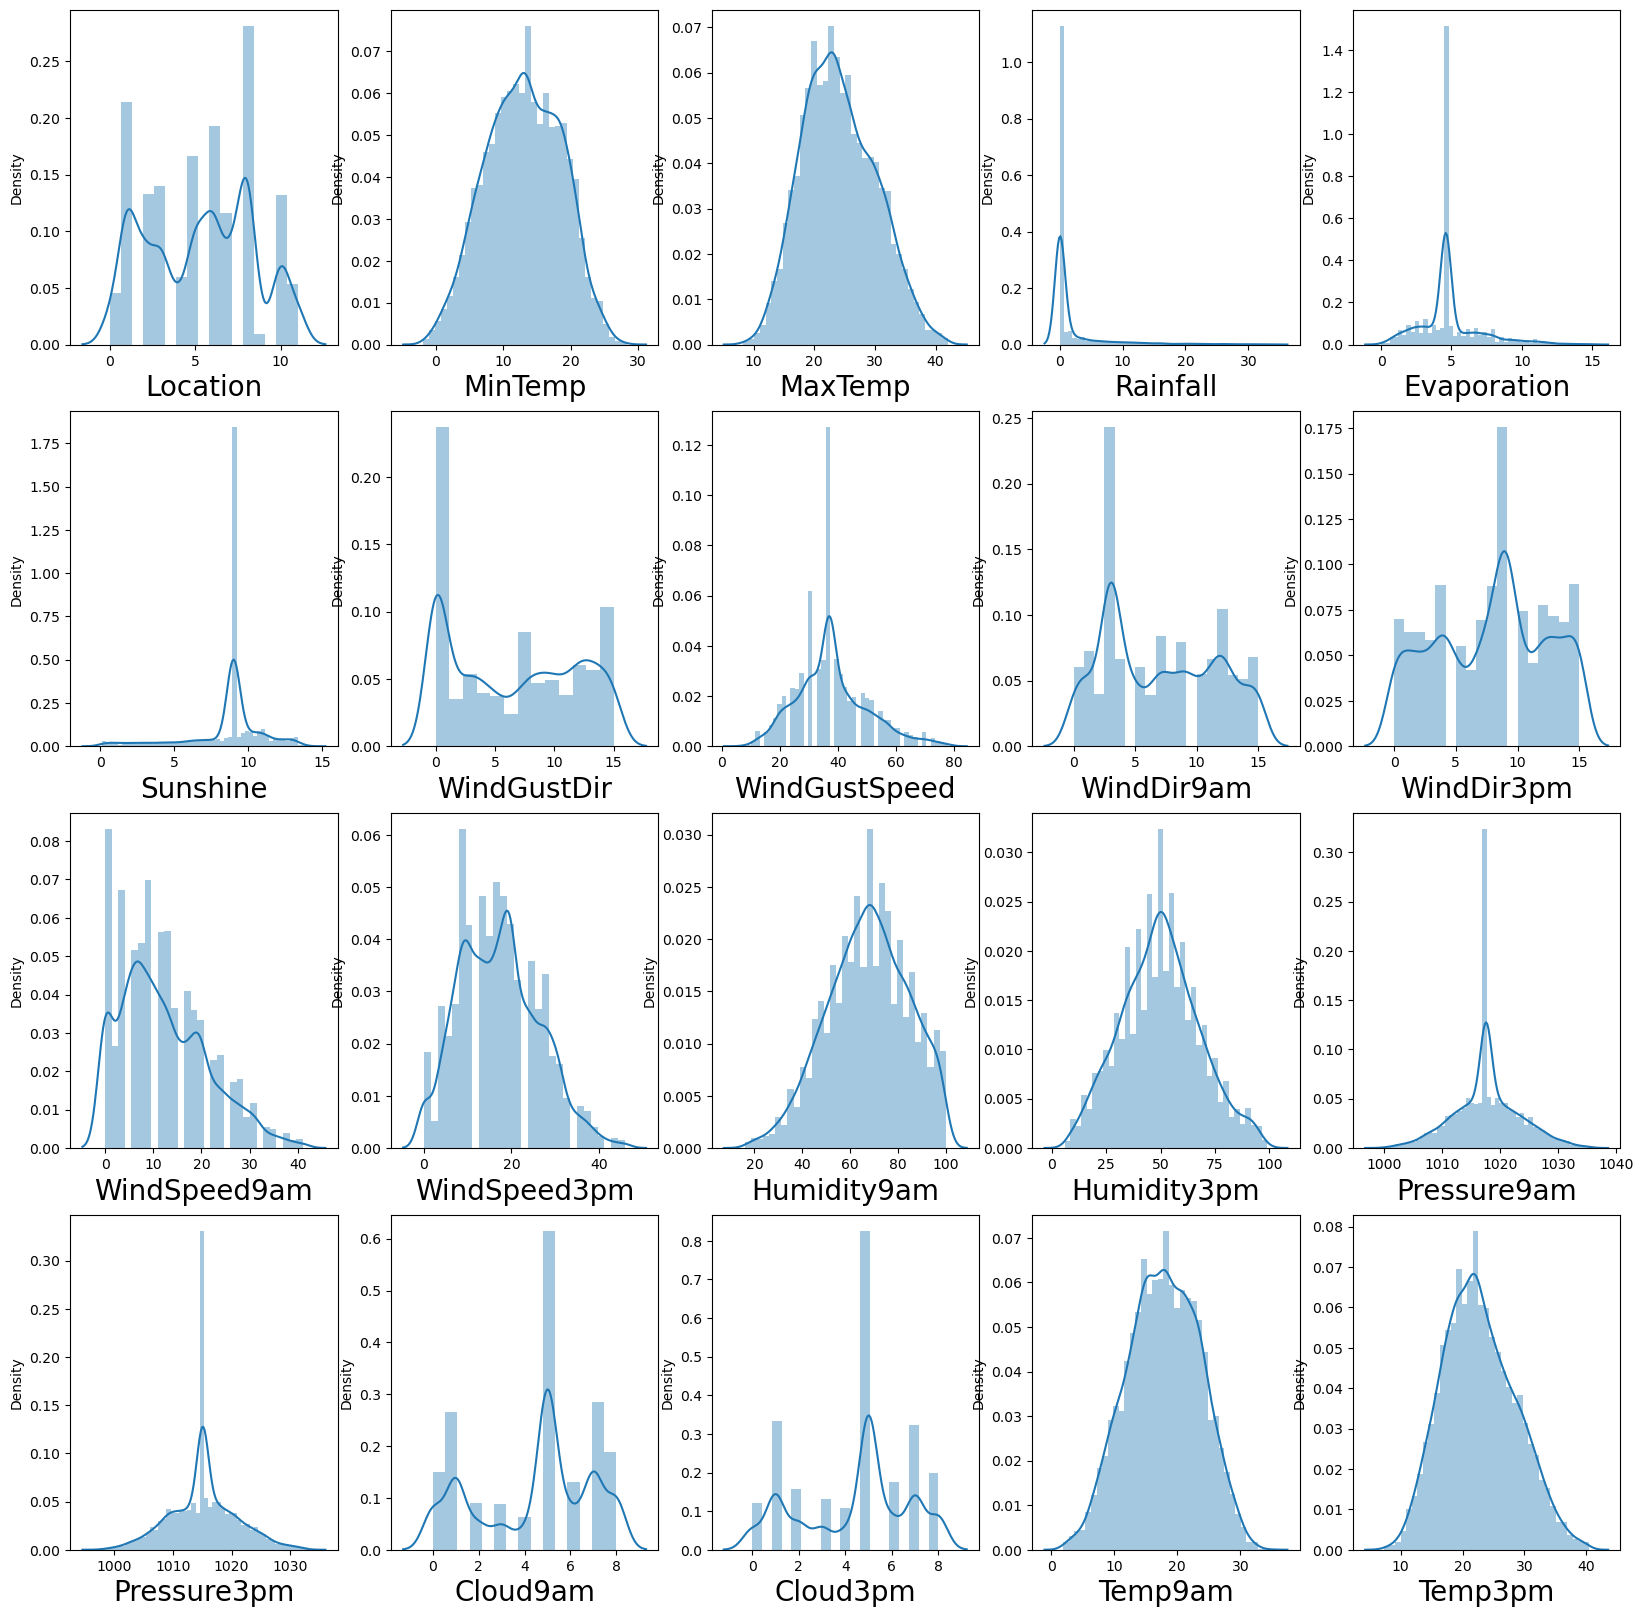

In [32]:
plt.figure(figsize=(20,20))
p=1

for col in df:
    if p<=20:
        ax=plt.subplot(4,5,p)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    p+=1
plt.tight_layout

In [33]:
df.skew()

Location        -0.003982
MinTemp         -0.073388
MaxTemp          0.263007
Rainfall         3.569116
Evaporation      1.135403
Sunshine        -1.357098
WindGustDir      0.106731
WindGustSpeed    0.544083
WindDir9am       0.212090
WindDir3pm      -0.127238
WindSpeed9am     0.679102
WindSpeed3pm     0.342410
Humidity9am     -0.224489
Humidity3pm      0.139203
Pressure9am      0.067225
Pressure3pm      0.088147
Cloud9am        -0.399093
Cloud3pm        -0.369549
Temp9am         -0.075236
Temp3pm          0.287596
RainToday        1.368925
RainTomorrow     1.381418
dtype: float64

<AxesSubplot:>

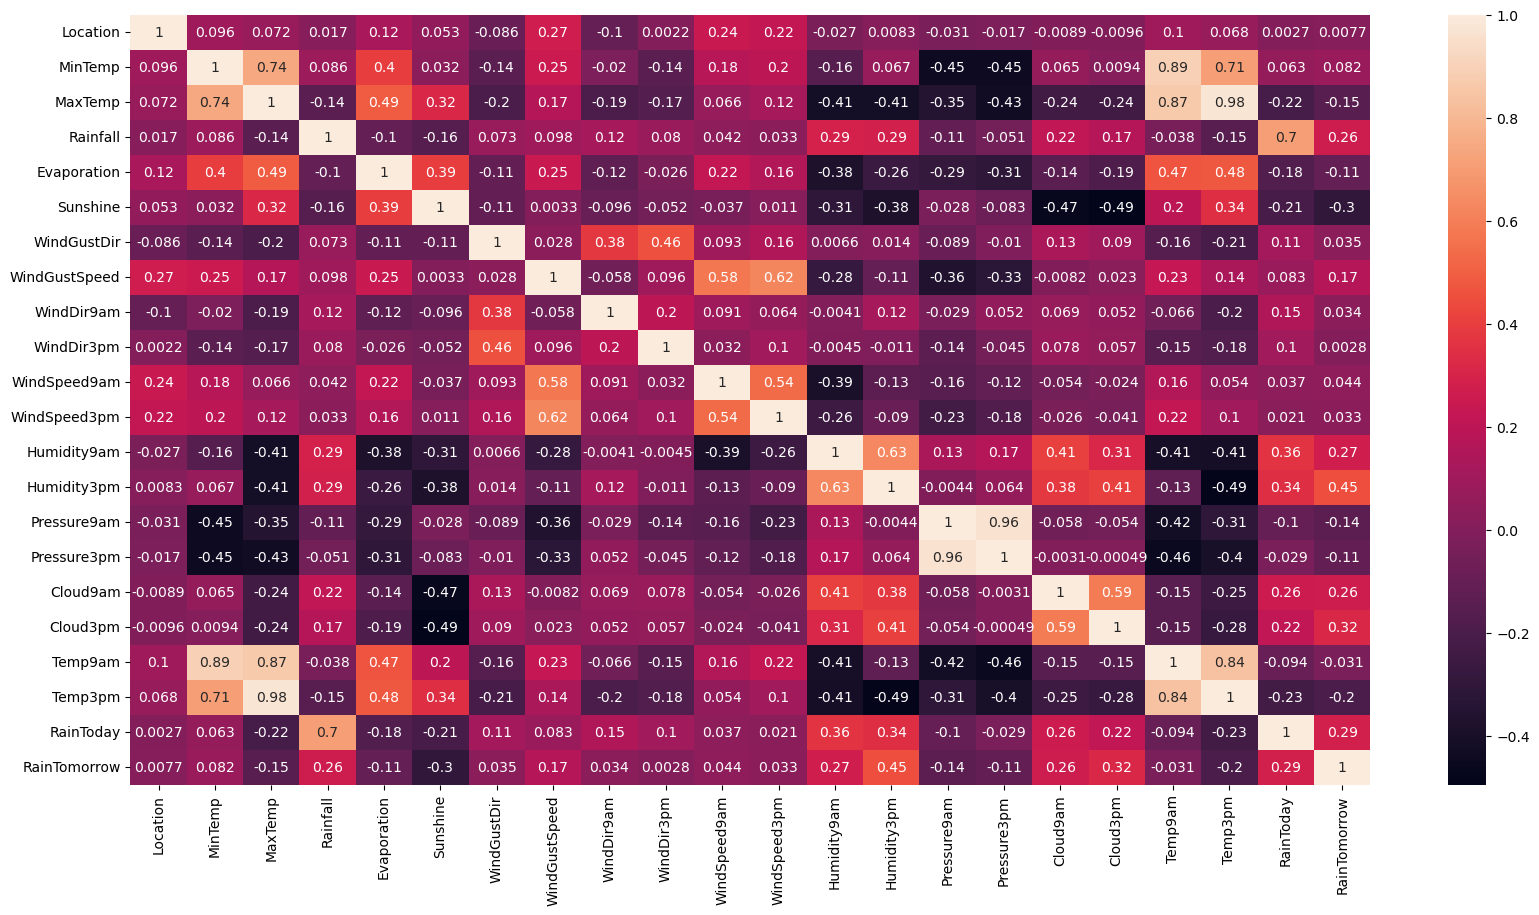

In [34]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [35]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,1,13.4,22.9,0.6,4.6,9.0,13,44.0,13,14,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
2008-12-02,1,7.4,25.1,0.0,4.6,9.0,14,44.0,6,15,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
2008-12-03,1,12.9,25.7,0.0,4.6,9.0,15,46.0,13,15,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0
2008-12-04,1,9.2,28.0,0.0,4.6,9.0,4,24.0,9,0,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0
2008-12-05,1,17.5,32.3,1.0,4.6,9.0,13,41.0,1,7,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


# Predicting RainTomorrow

In [36]:
x=df.drop('RainTomorrow',axis=1)
y=df['RainTomorrow']

In [37]:
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,-1.389415,0.076965,-0.200780,-0.254049,-0.100458,0.154447,1.222980,0.505573,1.319686,1.370552,...,0.753582,0.213764,-1.559909,-1.765834,-1.439668,1.434155,0.247782,-0.163101,-0.159490,-0.527421
1,-1.389415,-1.004619,0.164469,-0.383377,-0.100458,0.154447,1.413805,0.505573,-0.222561,1.593482,...,0.533227,-1.386921,-1.392335,-1.257490,-1.315912,0.226987,0.247782,-0.110507,0.266738,-0.527421
2,-1.389415,-0.013167,0.264083,-0.383377,-0.100458,0.154447,1.604631,0.669337,1.319686,1.593482,...,0.973937,-1.742628,-1.113047,-1.783363,-1.156797,0.226987,-1.039526,0.555682,0.079198,-0.527421
3,-1.389415,-0.680144,0.645935,-0.383377,-0.100458,0.154447,-0.494448,-1.132064,0.438402,-1.750472,...,-0.899080,-1.327636,-1.895055,-0.030452,-0.431940,0.226987,0.247782,0.047275,0.641818,-0.527421
4,-1.389415,0.816048,1.359832,-0.167829,-0.100458,0.154447,1.222980,0.259928,-1.324166,-0.189960,...,0.312873,0.865894,-0.945473,-1.222431,-1.634142,1.031766,1.535089,-0.005319,1.187389,-0.527421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6290,1.194445,-1.833833,-0.117769,-0.383377,-0.100458,0.154447,-1.257750,-0.558891,0.438402,-1.527542,...,-0.678725,-0.971928,-1.448193,1.196585,0.894018,0.226987,0.247782,-1.355229,-0.057195,-0.527421
6291,1.194445,-1.689622,0.197674,-0.383377,-0.100458,0.154447,-0.112798,-1.295827,0.438402,-1.081681,...,-0.899080,-0.675505,-1.615766,1.003765,0.681865,0.226987,0.247782,-1.214979,0.300836,-0.527421
6292,1.194445,-1.365147,0.463310,-0.383377,-0.100458,0.154447,-0.685274,-0.067600,0.438402,1.370552,...,-0.899080,-0.853359,-1.448193,0.565537,0.275238,0.226987,0.247782,-0.934478,0.573622,-0.527421
6293,1.194445,-0.932513,0.479912,-0.383377,-0.100458,0.154447,0.459679,-0.804536,0.658723,-1.081681,...,-1.119435,-0.971928,-1.448193,0.285071,0.222199,-0.577792,-1.039526,-0.478664,0.556572,-0.527421


In [38]:
from imblearn.over_sampling import SMOTE

In [39]:
sm=SMOTE()
X,Y=sm.fit_resample(x,y)

In [40]:
Y.value_counts()

0    4936
1    4936
Name: RainTomorrow, dtype: int64

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score,GridSearchCV

# Finding Best Random State for Classification Model

In [42]:
maxAcc=0
maxRs=0
for i in range(1000):
    lr=LogisticRegression()
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    ac=accuracy_score(y_test,pred)
    if ac>maxAcc:
        maxAcc=ac
        maxRs=i
print("Best Score ",maxAcc)
print("Best random state ",maxRs)

Best Score  0.7937204591492235
Best random state  837


In [43]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=maxRs)

In [44]:
print('Shape of x_train :',x_train.shape)
print('Shape of x_tets :',x_test.shape)
print('Shape of y_train :',y_train.shape)
print('Shape of y_test :',y_test.shape)

Shape of x_train : (6910, 21)
Shape of x_tets : (2962, 21)
Shape of y_train : (6910,)
Shape of y_test : (2962,)


In [45]:
def classify(clf,x,y):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=272)
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    acc_score=accuracy_score(y_test,pred)
    print('Accuracy Score :',acc_score)
    con_matrix=confusion_matrix(y_test,pred)
    print('Confusion Matrix :',con_matrix)
    class_report=classification_report(y_test,pred)
    print('Classification Report :',class_report)
    cv_score=(cross_val_score(clf,X,Y,cv=5).mean())
    print('Cross Validation Score :',cv_score)
    result=acc_score-cv_score
    print('Result :',result)

# Logistic Regression

In [46]:
clf=LogisticRegression()
classify(clf,x,y)

Accuracy Score : 0.7711006076975017
Confusion Matrix : [[1150  302]
 [ 376 1134]]
Classification Report :               precision    recall  f1-score   support

           0       0.75      0.79      0.77      1452
           1       0.79      0.75      0.77      1510

    accuracy                           0.77      2962
   macro avg       0.77      0.77      0.77      2962
weighted avg       0.77      0.77      0.77      2962

Cross Validation Score : 0.7197196465443166
Result : 0.05138096115318502


# Decision Tree Classifier

In [47]:
clf=DecisionTreeClassifier()
classify(clf,x,y)

Accuracy Score : 0.8099257258609048
Confusion Matrix : [[1145  307]
 [ 256 1254]]
Classification Report :               precision    recall  f1-score   support

           0       0.82      0.79      0.80      1452
           1       0.80      0.83      0.82      1510

    accuracy                           0.81      2962
   macro avg       0.81      0.81      0.81      2962
weighted avg       0.81      0.81      0.81      2962

Cross Validation Score : 0.6989641029587165
Result : 0.11096162290218836


# Gradient Boosting Classifier

In [48]:
clf=GradientBoostingClassifier()
classify(clf,x,y)

Accuracy Score : 0.8474004051316678
Confusion Matrix : [[1245  207]
 [ 245 1265]]
Classification Report :               precision    recall  f1-score   support

           0       0.84      0.86      0.85      1452
           1       0.86      0.84      0.85      1510

    accuracy                           0.85      2962
   macro avg       0.85      0.85      0.85      2962
weighted avg       0.85      0.85      0.85      2962

Cross Validation Score : 0.6603773100945199
Result : 0.18702309503714787


# Random Forest Classifier

In [49]:
clf=RandomForestClassifier()
classify(clf,x,y)

Accuracy Score : 0.8946657663740716
Confusion Matrix : [[1279  173]
 [ 139 1371]]
Classification Report :               precision    recall  f1-score   support

           0       0.90      0.88      0.89      1452
           1       0.89      0.91      0.90      1510

    accuracy                           0.89      2962
   macro avg       0.89      0.89      0.89      2962
weighted avg       0.89      0.89      0.89      2962

Cross Validation Score : 0.7400885947699845
Result : 0.15457717160408713


# SVC

In [50]:
clf=SVC()
classify(clf,x,y)

Accuracy Score : 0.8281566509115462
Confusion Matrix : [[1185  267]
 [ 242 1268]]
Classification Report :               precision    recall  f1-score   support

           0       0.83      0.82      0.82      1452
           1       0.83      0.84      0.83      1510

    accuracy                           0.83      2962
   macro avg       0.83      0.83      0.83      2962
weighted avg       0.83      0.83      0.83      2962

Cross Validation Score : 0.7248926166750028
Result : 0.1032640342365434


# Ada Boost Classifier

In [51]:
clf=AdaBoostClassifier()
classify(clf,x,y)

Accuracy Score : 0.8163403106009454
Confusion Matrix : [[1193  259]
 [ 285 1225]]
Classification Report :               precision    recall  f1-score   support

           0       0.81      0.82      0.81      1452
           1       0.83      0.81      0.82      1510

    accuracy                           0.82      2962
   macro avg       0.82      0.82      0.82      2962
weighted avg       0.82      0.82      0.82      2962

Cross Validation Score : 0.6359650648301335
Result : 0.18037524577081188


# XG Boost Classifier

In [52]:
import xgboost as xgb

In [53]:
clf=xgb.XGBClassifier()
classify(clf,x,y)

Accuracy Score : 0.8946657663740716
Confusion Matrix : [[1325  127]
 [ 185 1325]]
Classification Report :               precision    recall  f1-score   support

           0       0.88      0.91      0.89      1452
           1       0.91      0.88      0.89      1510

    accuracy                           0.89      2962
   macro avg       0.90      0.90      0.89      2962
weighted avg       0.90      0.89      0.89      2962

Cross Validation Score : 0.6811463455298629
Result : 0.21351942084420872


From the evolution metrics, I choose Random Forest Classifier as an best model because it has best f1 score and less difference between cv score and acc score.

In [54]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
acc_score=accuracy_score(y_test,pred)
print('Accuracy Score :',acc_score)
con_matrix=confusion_matrix(y_test,pred)
print('Confusion Matrix :',con_matrix)
class_report=classification_report(y_test,pred)
print('Classification Report :',class_report)

Accuracy Score : 0.9051316677920324
Confusion Matrix : [[1336  155]
 [ 126 1345]]
Classification Report :               precision    recall  f1-score   support

           0       0.91      0.90      0.90      1491
           1       0.90      0.91      0.91      1471

    accuracy                           0.91      2962
   macro avg       0.91      0.91      0.91      2962
weighted avg       0.91      0.91      0.91      2962



# Hyper parameter Tuning

In [55]:
model = RandomForestClassifier()
param_grid = {
    'n_estimators': [200,500],
    'max_features': [.5,.7],
    'bootstrap': [False, True],
    'max_depth':[3,6],
    'criterion':['gini','entropy']
}
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=2)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [False, True],
                         'criterion': ['gini', 'entropy'], 'max_depth': [3, 6],
                         'max_features': [0.5, 0.7],
                         'n_estimators': [200, 500]})

In [56]:
print('Best Score:',grid_search.best_score_*100)
print('Best estimator:',grid_search.best_estimator_)
print('Best parameters:', grid_search.best_params_)

Best Score: 80.31837916063675
Best estimator: RandomForestClassifier(criterion='entropy', max_depth=6, max_features=0.5,
                       n_estimators=200)
Best parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 6, 'max_features': 0.5, 'n_estimators': 200}


In [57]:
rf_final=RandomForestClassifier(criterion='gini',bootstrap=True,max_depth=6,max_features=0.5,n_estimators=500)
rf_final.fit(x_train,y_train)
pred_f=rf_final.predict(x_test)
acc_score=accuracy_score(y_test,pred_f)
print('Accuracy Score :',acc_score)
con_matrix=confusion_matrix(y_test,pred_f)
print('Confusion Matrix :',con_matrix)
class_report=classification_report(y_test,pred_f)
print('Classification Report :',class_report)

Accuracy Score : 0.8234301147873059
Confusion Matrix : [[1230  261]
 [ 262 1209]]
Classification Report :               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1491
           1       0.82      0.82      0.82      1471

    accuracy                           0.82      2962
   macro avg       0.82      0.82      0.82      2962
weighted avg       0.82      0.82      0.82      2962



# AOC RUC Curve

In [58]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics

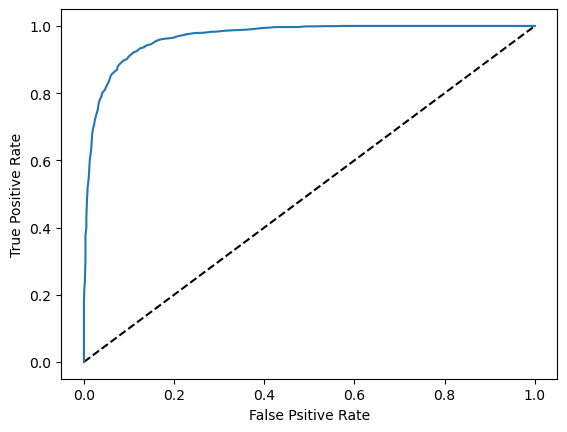

Score: 90.51934539482534


In [59]:
y_pred_prob=rf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False Psitive Rate')
plt.ylabel('True Positive Rate')
plt.show()
auc_score=roc_auc_score(y_test,rf.predict(x_test))
print('Score:',auc_score*100)

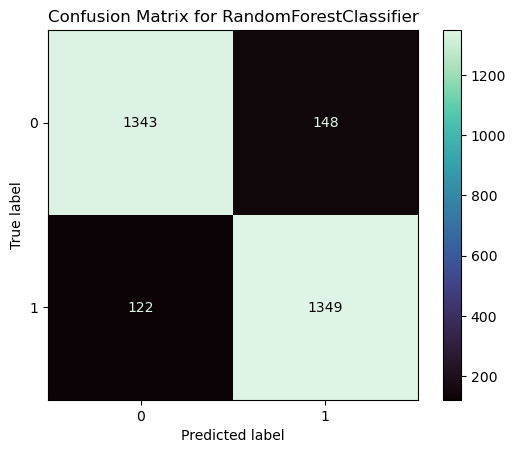

In [60]:
class_names=df.columns
metrics.plot_confusion_matrix(rf.fit(x_train,y_train),x_test,y_test,cmap='mako')
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

# Saving The Model

In [61]:
import pickle

In [62]:
filename='Insurance Claim Fraud Detection.pkl'
pickle.dump(rf,open(filename,'wb'))
loaded_model=pickle.load(open('Insurance Claim Fraud Detection.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

90.88453747467928


In [63]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,2952,2953,2954,2955,2956,2957,2958,2959,2960,2961
Predicted,0,1,0,0,0,1,0,0,1,1,...,0,0,0,1,0,0,0,1,1,0
Original,0,1,0,0,0,1,0,0,1,1,...,0,0,0,1,0,0,0,1,1,0


# Predicting Rainfal

In [64]:
x=df.drop('Rainfall',axis=1)
y=df['Rainfall']

In [65]:
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,-1.389415,0.076965,-0.200780,-0.100458,0.154447,1.222980,0.505573,1.319686,1.370552,0.871710,...,0.213764,-1.559909,-1.765834,-1.439668,1.434155,0.247782,-0.163101,-0.159490,-0.527421,-0.524713
1,-1.389415,-1.004619,0.164469,-0.100458,0.154447,1.413805,0.505573,-0.222561,1.593482,-0.903541,...,-1.386921,-1.392335,-1.257490,-1.315912,0.226987,0.247782,-0.110507,0.266738,-0.527421,-0.524713
2,-1.389415,-0.013167,0.264083,-0.100458,0.154447,1.604631,0.669337,1.319686,1.593482,0.760756,...,-1.742628,-1.113047,-1.783363,-1.156797,0.226987,-1.039526,0.555682,0.079198,-0.527421,-0.524713
3,-1.389415,-0.680144,0.645935,-0.100458,0.154447,-0.494448,-1.132064,0.438402,-1.750472,-0.126869,...,-1.327636,-1.895055,-0.030452,-0.431940,0.226987,0.247782,0.047275,0.641818,-0.527421,-0.524713
4,-1.389415,0.816048,1.359832,-0.100458,0.154447,1.222980,0.259928,-1.324166,-0.189960,-0.570682,...,0.865894,-0.945473,-1.222431,-1.634142,1.031766,1.535089,-0.005319,1.187389,-0.527421,-0.524713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6290,1.194445,-1.833833,-0.117769,-0.100458,0.154447,-1.257750,-0.558891,0.438402,-1.527542,0.095037,...,-0.971928,-1.448193,1.196585,0.894018,0.226987,0.247782,-1.355229,-0.057195,-0.527421,-0.524713
6291,1.194445,-1.689622,0.197674,-0.100458,0.154447,-0.112798,-1.295827,0.438402,-1.081681,0.095037,...,-0.675505,-1.615766,1.003765,0.681865,0.226987,0.247782,-1.214979,0.300836,-0.527421,-0.524713
6292,1.194445,-1.365147,0.463310,-0.100458,0.154447,-0.685274,-0.067600,0.438402,1.370552,-0.348776,...,-0.853359,-1.448193,0.565537,0.275238,0.226987,0.247782,-0.934478,0.573622,-0.527421,-0.524713
6293,1.194445,-0.932513,0.479912,-0.100458,0.154447,0.459679,-0.804536,0.658723,-1.081681,0.095037,...,-0.971928,-1.448193,0.285071,0.222199,-0.577792,-1.039526,-0.478664,0.556572,-0.527421,-0.524713


In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [67]:
vif=pd.DataFrame()
vif['Features']=x.columns
vif['Vif Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,Features,Vif Values
0,Location,1.160568
1,MinTemp,8.968576
2,MaxTemp,26.502841
3,Evaporation,1.670344
4,Sunshine,1.754692
5,WindGustDir,1.528911
6,WindGustSpeed,2.370656
7,WindDir9am,1.330567
8,WindDir3pm,1.407245
9,WindSpeed9am,2.070208


In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xg
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

# Finding Best random state for building models

In [70]:
maxAcc=0
maxRS=0
for i in range(200):
    lr=LinearRegression()
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        
print('Max R2 Score is',acc)
print('Best Random State is',maxRs)

Max R2 Score is 0.5155389151696387
Best Random State is 23


In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=23)

In [72]:
print('Size of x_train:',x_train.shape)
print('Size of x_test:',x_test.shape)
print('Size of y_train:',y_train.shape)
print('Size of y_test:',y_test.shape)

Size of x_train: (4406, 21)
Size of x_test: (1889, 21)
Size of y_train: (4406,)
Size of y_test: (1889,)


In [73]:
def classify(clf,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=327)
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    MAE=mean_absolute_error(y_test,pred)
    print('The Mean Absolute Error ',MAE)
    MSE=mean_squared_error(y_test,pred)
    print('The Mean Squared Error ',MSE)
    Accuracy_Score=r2_score(y_test,pred)*100
    print('R2 Score ',Accuracy_Score)

# Linear Regression

In [76]:
clf=LinearRegression()
classify(clf,x,y)

The Mean Absolute Error  1.4741151446967613
The Mean Squared Error  11.940705978075123
R2 Score  51.079598328848185


# Decision Tree Regressor

In [77]:
clf=DecisionTreeRegressor()
classify(clf,x,y)

The Mean Absolute Error  1.6733721545791425
The Mean Squared Error  22.24021175224987
R2 Score  8.88310170527089


# Random Forest Regressor

In [78]:
clf=RandomForestRegressor()
classify(clf,x,y)

The Mean Absolute Error  1.2381746956061408
The Mean Squared Error  11.32807188035998
R2 Score  53.58952581493639


# Gradient Boosting Regressor

In [79]:
clf=GradientBoostingRegressor()
classify(clf,x,y)

The Mean Absolute Error  1.282698258434575
The Mean Squared Error  11.693976413979962
R2 Score  52.09043549390743


# Lasso

In [81]:
clf=Lasso()
classify(clf,x,y)

The Mean Absolute Error  1.6045444392552712
The Mean Squared Error  13.920355178214171
R2 Score  42.96908675469179


# Ridge

In [82]:
clf=Ridge()
classify(clf,x,y)

The Mean Absolute Error  1.4739067488638082
The Mean Squared Error  11.940881734904018
R2 Score  51.07887826299263


# KNeighbors Regressor

In [83]:
clf=KNeighborsRegressor()
classify(clf,x,y)

The Mean Absolute Error  1.3018951826363154
The Mean Squared Error  12.842307252514559
R2 Score  47.3857885512868


# Support Vector Regressor

In [84]:
clf=SVR(kernel='linear')
classify(clf,x,y)

clf=SVR(kernel='poly')
classify(clf,x,y)

clf=SVR(kernel='rbf')
classify(clf,x,y)

The Mean Absolute Error  1.2939257400100326
The Mean Squared Error  14.670078898340902
R2 Score  39.8975107860402
The Mean Absolute Error  1.2873587213376083
The Mean Squared Error  14.313028571981654
R2 Score  41.36032591727133
The Mean Absolute Error  1.2636261629864876
The Mean Squared Error  14.513897301973087
R2 Score  40.53737801348758


# Ada Boost Regressor

In [86]:
clf=AdaBoostRegressor()
classify(clf,x,y)

The Mean Absolute Error  1.4403303986306877
The Mean Squared Error  12.824480327316554
R2 Score  47.45882446246736


# XG Boost Regressor

In [88]:
clf=xg.XGBRegressor()
classify(clf,x,y)

The Mean Absolute Error  1.42019490148389
The Mean Squared Error  12.907068037089292
R2 Score  47.12046725456012


From the above evaluation Metrics, We can clearly see that Random Forest Regressor is giving best R2 score and least MSE and MAE so selecting Ridge Regressor as our final model

In [91]:
rf=RandomForestRegressor()
rf.fit(x,y)
pred=rf.predict(x_test)
MAE=mean_absolute_error(y_test,pred)
print('The Mean Absolute Error ',MAE)
MSE=mean_squared_error(y_test,pred)
print('The Mean Squared Error ',MSE)
Accuracy_Score=r2_score(y_test,pred)*100
print('R2 Score ',Accuracy_Score)

The Mean Absolute Error  0.38373054526204353
The Mean Squared Error  0.9830093769190055
R2 Score  94.18688802198305


# Saving the Model

In [93]:
import pickle

In [94]:
filename='Rainfall Weather Forecasting.pkl'
pickle.dump(rf,open(filename,'wb'))
loaded_model=pickle.load(open('Rainfall Weather Forecasting.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

94.18688802198305


In [95]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888
Predicted,17.276,0.12,0.002,0.0,8.63,0.032,0.0,3.908,0.005,0.002,...,0.648,4.314,0.012,0.008,0.022,0.003,6.504,0.05,0.044,0.629
Original,17.276,0.12,0.002,0.0,8.63,0.032,0.0,3.908,0.005,0.002,...,0.648,4.314,0.012,0.008,0.022,0.003,6.504,0.05,0.044,0.629
